**линейная регрессия, аналитическое решение**

Евгений Борисов  <esborisov@sevsu.ru>

# генерируем набор данных

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(precision=2)

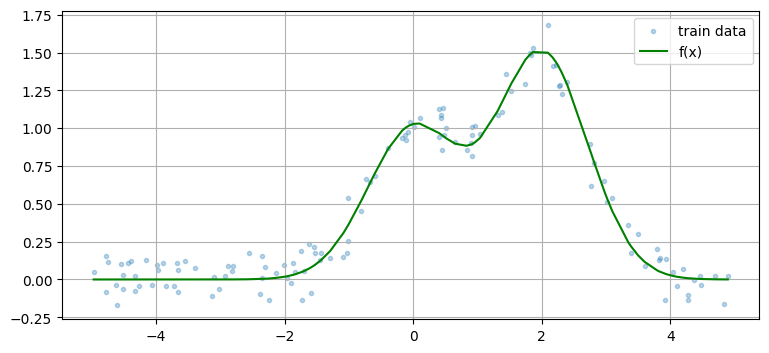

In [4]:
def f(x):
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples=128, noise=.1):
    x = np.sort( rng.rand(n_samples)*10. - 5.)
    return x.reshape(-1,1), (f(x)+rng.normal(0., noise, n_samples)).reshape(-1,1)

X_train,y_train = generate()

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
# ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.grid()
ax.legend()

In [5]:
# нормируем данные
# from sklearn.preprocessing   import StandardScaler
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

## модель

$$a(x,w) = \sum\limits_{i=1} x_i \cdot w_i + w_0$$

In [6]:
class LinearRegression:
    
    def __init__( self, weight=np.array([]) ):
        self._weight = weight
    
    def score(self,x):
        assert len(x)>0
        assert x.shape[1]==len(self._weight)
        return x.dot(self._weight)
    
    def predict(self,x): 
        return self.score(x)
    
    @property
    def weight(self): return self._weight

    @weight.setter
    def weight(self,value): self._weight = value
            
#     def score_partial(self,x): # частные производные модели по её параметрам
#         return x

## обучаем модель

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# собираем полином, добавляем столбец из единиц (свободный член)
poly = PolynomialFeatures( degree=17, interaction_only=False, include_bias=True,).fit(X_train)
# poly.transform(X_train)

$$ w = (X^T \cdot X)^{-1} \cdot X^T \cdot y $$

In [8]:
# вычисляем параметры регрессии
class RegressionTrain: 
    def __init__(self,model):
        self._model = model
        
    def fit(self,X,target): 
        self._model.weight = np.linalg.inv( X.T.dot(X) ).dot(X.T).dot(target) 
        return self._model


In [9]:
model = RegressionTrain(LinearRegression()).fit(poly.transform(X_train),y_train)

In [13]:
model.weight.T

array([[ 1.02e+00,  2.07e-01, -7.24e-01,  9.76e-02,  4.62e-01,  1.54e-02,
        -1.26e-01, -1.66e-02,  1.73e-02,  3.25e-03, -1.34e-03, -2.98e-04,
         5.89e-05,  1.45e-05, -1.38e-06, -3.63e-07,  1.33e-08,  3.68e-09]])

## тестируем

In [10]:
X_test,y_test = generate()

0.013562996703468248

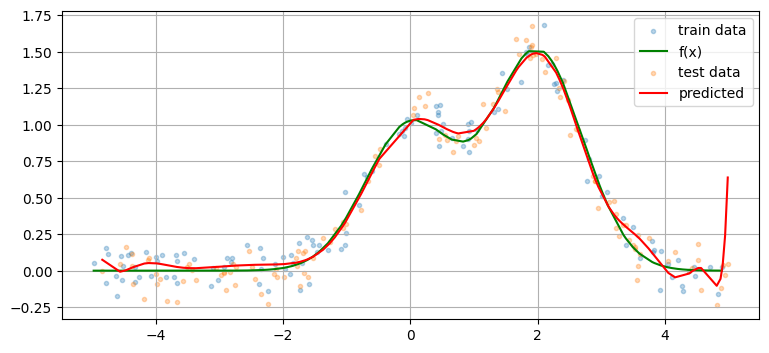

In [11]:
# X_test,y_test = generate()
predicted = model.predict(poly.transform(X_test))

from sklearn.metrics import mean_squared_error

display( mean_squared_error( y_true=y_test, y_pred = predicted ) )

# рисуем результат
fig,ax = plt.subplots(figsize=(9,4))
ax.scatter(x=X_train,y=y_train,alpha=.3,marker='.',label='train data') # точки учебного набора
ax.plot(X_train,f(X_train),c='g',label='f(x)')
ax.scatter(x=X_test,y=y_test,alpha=.3,marker='.',label='test data') # точки учебного набора
ax.plot(X_test,predicted,c='r',label='predicted')
ax.grid()
ax.legend()